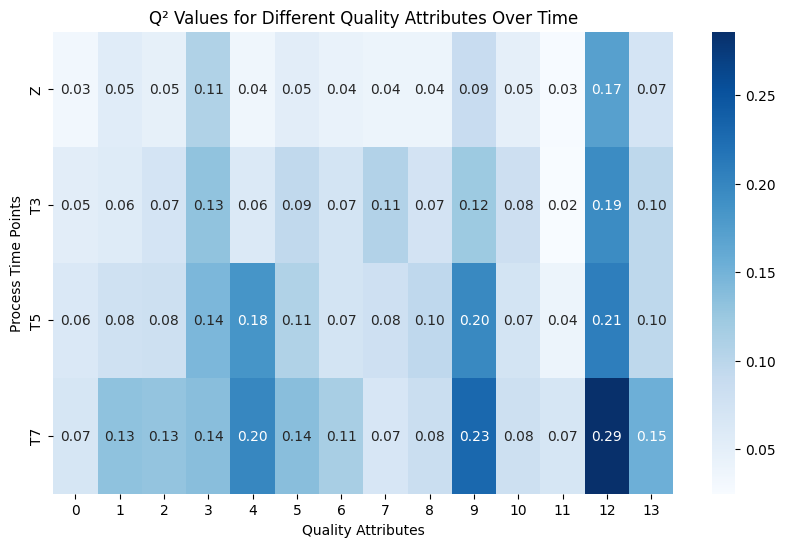

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 模拟数据（替换为真实数据）
np.random.seed(42)
n_samples = 91
n_predictors = 20
n_quality_attrs = 14

X = np.random.randn(n_samples, n_predictors)  # 过程信息
Y = np.random.randn(n_samples, n_quality_attrs)  # 质量属性

# 进行 PLS1 回归并计算 Q²
def pls1_predict(X, Y, n_components=5):
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, Y)
    Y_pred = pls.predict(X)
    return r2_score(Y, Y_pred, multioutput='raw_values')

# 自动缩放数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 不同时间点的过程数据
process_blocks = {
    'Z': X_scaled[:, :5],
    'T3': X_scaled[:, :10],
    'T5': X_scaled[:, :15],
    'T7': X_scaled[:, :20]
}

# 为每个质量属性构建 PLS1 模型
q2_values = {}
for time_point, X_block in process_blocks.items():
    q2_values[time_point] = pls1_predict(X_block, Y)

# 可视化结果
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(q2_values).T, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Quality Attributes")
plt.ylabel("Process Time Points")
plt.title("Q² Values for Different Quality Attributes Over Time")
plt.show()

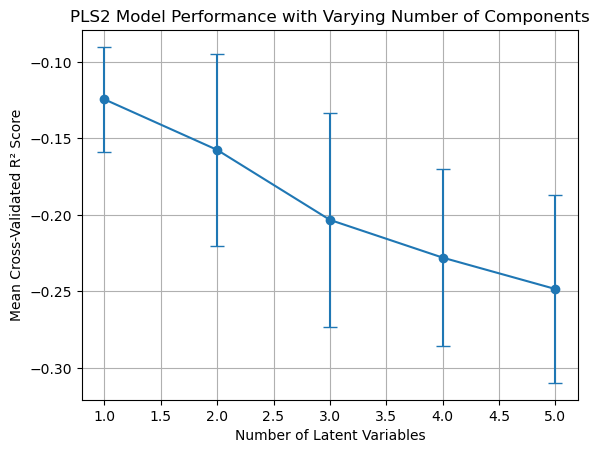

In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
import matplotlib.pyplot as plt

# 模拟数据生成
np.random.seed(42)
n_samples = 100
n_features = 10
n_targets = 5

X = np.random.normal(size=(n_samples, n_features))
Y = np.random.normal(size=(n_samples, n_targets))

# 定义 PLS2 模型
def pls2_model(X, Y, n_components, n_splits=5):
    pls2 = PLSRegression(n_components=n_components)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(pls2, X, Y, cv=kf, scoring=make_scorer(r2_score, multioutput='uniform_average'))
    return np.mean(scores), np.std(scores)

# 选择不同数量的潜在变量
components_range = range(1, 6)
mean_scores = []
std_devs = []

for n_components in components_range:
    mean_score, std_dev = pls2_model(X, Y, n_components)
    mean_scores.append(mean_score)
    std_devs.append(std_dev)

# 绘制性能图
plt.errorbar(components_range, mean_scores, yerr=std_devs, fmt='-o', capsize=5)
plt.title('PLS2 Model Performance with Varying Number of Components')
plt.xlabel('Number of Latent Variables')
plt.ylabel('Mean Cross-Validated R² Score')
plt.grid(True)
plt.show()

L = 6.765817740407732
k = 0.7915486405783586
x0 = 6.0847948250732


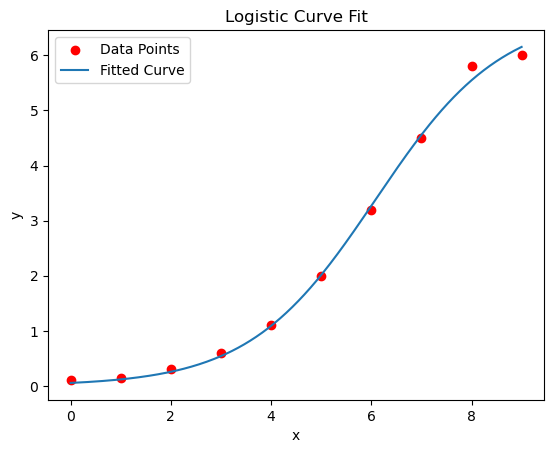

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 定义逻辑函数
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# 示例数据 (x值和y值)
xdata = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ydata = np.array([0.1, 0.15, 0.3, 0.6, 1.1, 2, 3.2, 4.5, 5.8, 6.0])

# 使用curve_fit进行逻辑函数拟合
params, covariance = curve_fit(logistic, xdata, ydata, p0=[max(ydata), 1, np.median(xdata)])

# 打印最优参数
print("L =", params[0])
print("k =", params[1])
print("x0 =", params[2])

# 绘制数据点
plt.scatter(xdata, ydata, color='red', label='Data Points')

# 绘制拟合曲线
xmodel = np.linspace(min(xdata), max(xdata), 300)
ymodel = logistic(xmodel, *params)
plt.plot(xmodel, ymodel, label='Fitted Curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Curve Fit')
plt.legend()
plt.show()


In [2]:
import numpy as np
import statsmodels.api as sm

# 生成一些测试数据
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 3 * X + np.random.normal(0, 2, 100) + 20 * np.random.binomial(1, 0.05, 100)  # 添加一些异常值

# 添加常数项
X = sm.add_constant(X)

# 拟合初始线性回归模型
model = sm.OLS(y, X).fit()

# 计算残差
residuals = np.abs(model.resid)

# 排序残差并找到削减点（例如削减最大的5%的数据点）
cutoff = np.percentile(residuals, 95)

# 保留残差小于削减点的数据
X_trimmed = X[residuals < cutoff]
y_trimmed = y[residuals < cutoff]

# 使用削减后的数据重新拟合模型
trimmed_model = sm.OLS(y_trimmed, X_trimmed).fit()

# 打印两个模型的参数进行比较
print("Original model params:", model.params)
print("Trimmed model params:", trimmed_model.params)

Original model params: [0.98723993 2.94647522]
Trimmed model params: [0.81313215 2.88825453]


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 假设有一些示例数据
X = np.random.rand(100, 10)  # 100个样本，10个特征
y = np.random.rand(100)      # 100个目标值

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 使用交叉验证调整模型
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# 训练模型
model.fit(X_train, y_train)

# 在测试集上预测
y_pred = model.predict(X_test)

# 计算RMSEP
rmsep = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error of Prediction (RMSEP): {rmsep:.4f}")

# 输出交叉验证得分
print(f"Cross-validation scores (MSE): {scores}")
print(f"Mean Cross-validation score (MSE): {np.mean(scores)}")

Root Mean Squared Error of Prediction (RMSEP): 0.3196
Cross-validation scores (MSE): [-0.08413335 -0.10340811 -0.09370041 -0.17144009 -0.09434413]
Mean Cross-validation score (MSE): -0.10940521438082777


In [5]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# 生成一些回归数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设置不同的模型配置
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf']
        }
    }
}

# 使用GridSearchCV进行交叉验证和超参数调整
for model_name, model_setup in models.items():
    grid_search = GridSearchCV(model_setup['model'], model_setup['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    y_pred = grid_search.predict(X_test)
    rmsep = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} RMSEP: {rmsep:.4f}")


Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}
RandomForestRegressor RMSEP: 91.2425
Best parameters for Ridge: {'alpha': 0.1}
Ridge RMSEP: 0.2250
Best parameters for SVR: {'C': 10, 'kernel': 'rbf'}
SVR RMSEP: 141.9000


In [17]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

class HistoricalPLS2:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.models = []

    def fit(self, Z, X, W, Y):
        T = X.shape[1]  # Number of time points
        for t in range(1, T):
            # Collect data up to time t
            X_t = X[:, :t, :].reshape(X.shape[0], -1)
            W_t = W[:, :t, :].reshape(W.shape[0], -1)
            inputs = np.hstack([Z, X_t, W_t])
            outputs = np.hstack([X[:, t, :], Y[:, t, :]])
            model = PLSRegression(n_components=self.n_components)
            model.fit(inputs, outputs)
            self.models.append(model)

    def predict(self, Z, X_0, W_0):
        T = len(self.models)
        X_pred = [X_0]
        W_pred = [W_0]
        for t in range(T):
            model = self.models[t]
            X_t = np.array(X_pred).reshape(1, -1)
            W_t = np.array(W_pred).reshape(1, -1)
            inputs = np.hstack([Z, X_t, W_t])
            output = model.predict(inputs)
            X_next = output[:, :-1]
            X_pred.append(X_next)
            W_pred.append(W_0)
        return np.array(X_pred).reshape(-1, X_0.shape[-1])

# 示例数据（需根据实际数据替换）
Z = np.random.rand(100, 5)  # 100 runs, 5 operating conditions
X = np.random.rand(100, 10, 6)  # 100 runs, 10 time points, 6 variables
W = np.random.rand(100, 10, 3)  # 100 runs, 10 time points, 3 control variables
Y = np.random.rand(100, 10, 1)  # 100 runs, 10 time points, 1 target variable

# 拟合模型
historical_pls2 = HistoricalPLS2(n_components=2)
historical_pls2.fit(Z, X, W, Y)

# 预测
Z_new = np.random.rand(1, 5)
X_0_new = np.random.rand(1, 6)
W_0_new = np.random.rand(1, 3)
X_pred = historical_pls2.predict(Z_new, X_0_new, W_0_new)

print(X_pred)


[[0.52222882 0.12307171 0.363085   0.41349834 0.07771429 0.74690667]
 [0.41125007 0.56127382 0.39176898 0.58559918 0.50830769 0.46117529]
 [0.47861594 0.42551202 0.55040068 0.34104348 0.65649757 0.50755089]
 [0.50957817 0.36254077 0.5385334  0.5015034  0.49622111 0.56708561]
 [0.50618459 0.53338566 0.56097355 0.46735749 0.46114103 0.46578297]
 [0.48360321 0.51056359 0.44562972 0.51202208 0.49059835 0.45003732]
 [0.46768591 0.54847335 0.50498568 0.44621832 0.50441419 0.49730776]
 [0.45106775 0.52687016 0.41113101 0.49240026 0.48988595 0.53741428]
 [0.50045508 0.51132734 0.43585598 0.63823542 0.42575072 0.55111151]
 [0.45221021 0.40798037 0.44600581 0.48178566 0.53436929 0.48293629]]


In [7]:
np.hstack([np.random.rand(100, 5), np.random.rand(100, 3)])

array([[8.13553391e-01, 2.20433529e-03, 5.00522585e-02, 3.49067670e-01,
        5.00974691e-01, 9.79106350e-01, 6.21775326e-01, 3.42290532e-02],
       [7.50938411e-01, 6.67326072e-01, 3.81970898e-01, 8.36433952e-01,
        5.25900268e-01, 5.49853126e-01, 4.52453992e-01, 5.13211495e-01],
       [6.29958486e-01, 9.96200805e-01, 3.03880610e-01, 1.16157716e-01,
        9.78271680e-01, 8.14974473e-01, 4.68509913e-02, 8.84842731e-01],
       [1.34287989e-01, 7.85493565e-01, 1.96474540e-01, 6.58838428e-01,
        4.68902521e-01, 3.83797701e-01, 7.12282650e-01, 4.77090665e-01],
       [2.90209990e-01, 5.72061451e-01, 2.39447956e-01, 1.08854412e-01,
        3.43469772e-01, 2.31155491e-01, 3.04393434e-01, 8.54673726e-01],
       [7.33128968e-01, 8.06306659e-02, 3.95780587e-01, 8.70083609e-01,
        8.84249983e-01, 3.77039704e-01, 6.89811551e-01, 1.10736905e-01],
       [4.08247884e-01, 4.84039902e-02, 7.96068692e-01, 7.84944978e-01,
        5.64894243e-01, 1.44541256e-01, 6.65661614e-01, 9.

In [18]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

class HistoricalPLS2:
    def __init__(self, max_components=10):
        self.max_components = max_components
        self.models = []

    def fit(self, Z, X, W, Y):
        T = X.shape[1]  # Number of time points
        for t in range(1, T):
            # Collect data up to time t
            X_t = X[:, :t, :].reshape(X.shape[0], -1)
            W_t = W[:, :t, :].reshape(W.shape[0], -1)
            inputs = np.hstack([Z, X_t, W_t])
            outputs = np.hstack([X[:, t, :], Y[:, t, :]])

            # Define PLS regression model and parameters for grid search
            pls = PLSRegression()
            param_grid = {'n_components': range(1, self.max_components + 1)}
            grid_search = GridSearchCV(pls, param_grid, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))
            grid_search.fit(inputs, outputs)
            
            # Select the best model
            best_model = grid_search.best_estimator_
            self.models.append(best_model)

    def predict(self, Z, X_0, W_0):
        T = len(self.models)
        X_pred = [X_0]
        W_pred = [W_0]
        for t in range(T):
            model = self.models[t]
            X_t = np.array(X_pred).reshape(1, -1)
            W_t = np.array(W_pred).reshape(1, -1)
            inputs = np.hstack([Z, X_t, W_t])
            output = model.predict(inputs)
            X_next = output[:, :-1]
            X_pred.append(X_next)
            W_pred.append(W_0)
        return np.array(X_pred).reshape(-1, X_0.shape[-1])

# 示例数据（需根据实际数据替换）
Z = np.random.rand(100, 5)  # 100 runs, 5 operating conditions
X = np.random.rand(100, 10, 6)  # 100 runs, 10 time points, 6 variables
W = np.random.rand(100, 10, 3)  # 100 runs, 10 time points, 3 control variables
Y = np.random.rand(100, 10, 1)  # 100 runs, 10 time points, 1 target variable

# 拟合模型
historical_pls2 = HistoricalPLS2(max_components=10)
historical_pls2.fit(Z, X, W, Y)

# 预测
Z_new = np.random.rand(1, 5)
X_0_new = np.random.rand(1, 6)
W_0_new = np.random.rand(1, 3)
X_pred = historical_pls2.predict(Z_new, X_0_new, W_0_new)

print(X_pred)

[[0.77783602 0.08199633 0.12973905 0.13773308 0.85074839 0.10445305]
 [0.50599125 0.51178036 0.46841806 0.54950638 0.4187777  0.45053211]
 [0.54910898 0.52985291 0.42299537 0.5653527  0.44158807 0.57344759]
 [0.49742201 0.50985813 0.58139941 0.49815809 0.54498614 0.5111782 ]
 [0.51338495 0.45633522 0.3939466  0.54432862 0.46511615 0.46495921]
 [0.50623545 0.61271709 0.50592339 0.43254041 0.29315242 0.36723633]
 [0.56920376 0.49158986 0.51920539 0.4817846  0.50239319 0.47316194]
 [0.42594622 0.49678471 0.55061659 0.50901284 0.46307692 0.57421223]
 [0.4998652  0.43172849 0.50439065 0.44062907 0.47736926 0.50677771]
 [0.60221288 0.53944025 0.59198986 0.56380555 0.54641067 0.32556913]]


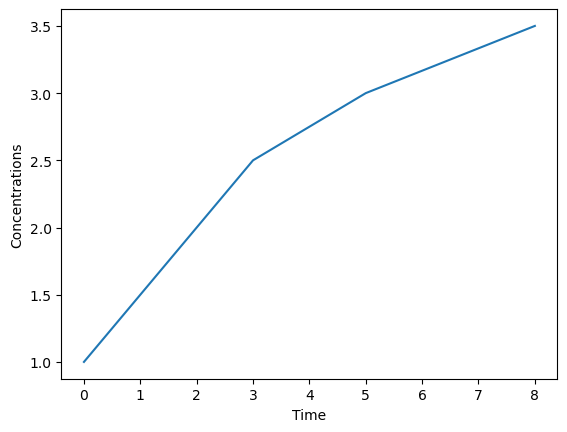

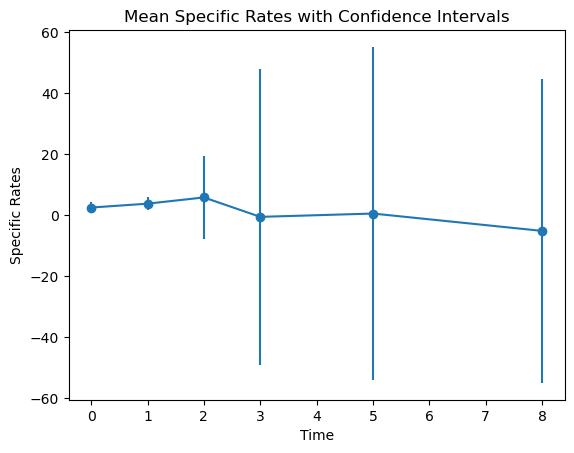

In [22]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# 示例数据
time_points = np.array([0, 1, 2, 3, 5, 8])
original_concentrations = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
biomass_concentrations = np.array([0.5, 0.7, 0.8, 0.9, 1.0, 1.1])
n_samples = 100

# 测量误差
cv_concentration = 0.10
cv_biomass = 0.05

# 生成随机测量值
random_concentrations = np.array([np.random.normal(loc=val, scale=val * cv_concentration, size=n_samples) for val in original_concentrations])
random_biomass = np.array([np.random.normal(loc=val, scale=val * cv_biomass, size=n_samples) for val in biomass_concentrations])

# 使用分段三次插值（CubicSpline）构建样条
def generate_spline(time_points, values):
    return CubicSpline(time_points, values, bc_type='natural')

# 计算特定速率
def compute_specific_rate(concentration_spline, biomass_spline, time_points):
    concentration_rates = concentration_spline(time_points, 1)  # 一阶导数
    biomass_rates = biomass_spline(time_points, 1)  # 一阶导数
    specific_rates = concentration_rates / biomass_rates
    return specific_rates

# 进行蒙特卡洛模拟
all_specific_rates = []

for i in range(n_samples):
    concentration_spline = generate_spline(time_points, random_concentrations[:, i])
    biomass_spline = generate_spline(time_points, random_biomass[:, i])
    specific_rates = compute_specific_rate(concentration_spline, biomass_spline, time_points)
    all_specific_rates.append(specific_rates)

all_specific_rates = np.array(all_specific_rates)
mean_specific_rates = np.mean(all_specific_rates, axis=0)
std_specific_rates = np.std(all_specific_rates, axis=0)

# 绘图
plt.figure()
plt.plot(time_points, original_concentrations)
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.show();
plt.figure()
plt.errorbar(time_points, mean_specific_rates, yerr=std_specific_rates, fmt='-o')
plt.xlabel('Time')
plt.ylabel('Specific Rates')
plt.title('Mean Specific Rates with Confidence Intervals')
plt.show();


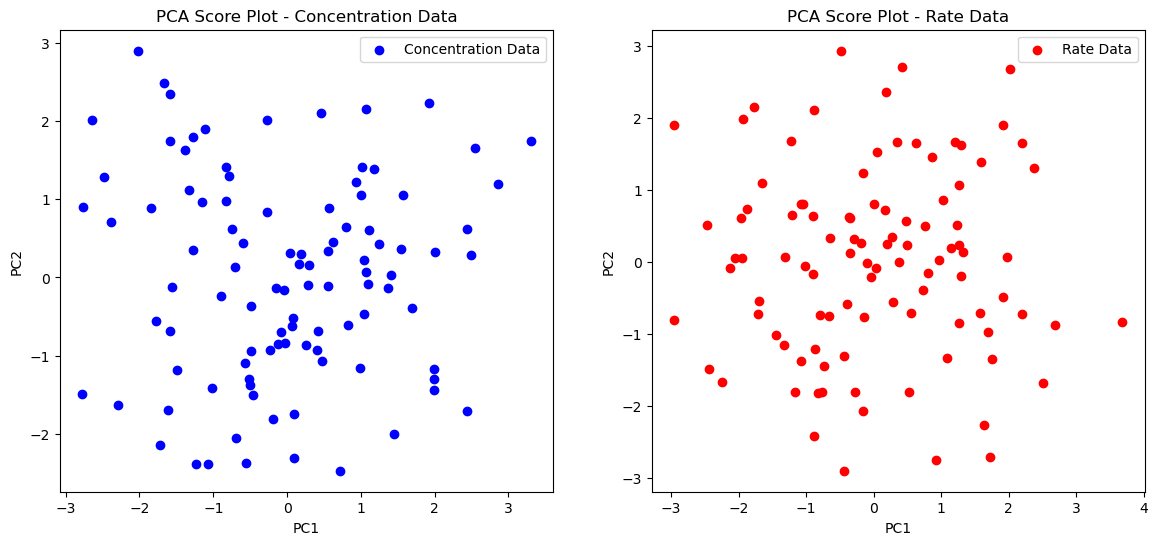

In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 示例数据（需要替换为实际数据）
concentration_data = np.random.rand(100, 20)  # 假设100个样本，20个浓度变量
rate_data = np.random.rand(100, 20)  # 假设100个样本，20个速率变量

# 标准化数据
concentration_data_scaled = (concentration_data - np.mean(concentration_data, axis=0)) / np.std(concentration_data, axis=0)
rate_data_scaled = (rate_data - np.mean(rate_data, axis=0)) / np.std(rate_data, axis=0)

# PCA 分析
pca_concentration = PCA(n_components=3)
pca_rate = PCA(n_components=3)

pca_concentration.fit(concentration_data_scaled)
pca_rate.fit(rate_data_scaled)

# 得分图
scores_concentration = pca_concentration.transform(concentration_data_scaled)
scores_rate = pca_rate.transform(rate_data_scaled)

# 图示
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(scores_concentration[:, 0], scores_concentration[:, 1], c='blue', label='Concentration Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Score Plot - Concentration Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(scores_rate[:, 0], scores_rate[:, 1], c='red', label='Rate Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Score Plot - Rate Data')
plt.legend()

plt.show()